# Лабораторная работа №3

Построить min 3 любых графика, анализирующих выбранный корпус данных

Можно рассмотреть такие варианты:
1. Зависимость кол-ва публикаций\лайков\просмотров и тп от времени публикации поста
2. Отследить динамику активности сообщества - зависимость между датой и кол-вом публикаций
3. Разделить ваши посты по темам (подобрать кол-во тем эмперическим путем). Посмотрет кол-во текстов в каждой теме. Отследить зависимость между лайками и темами (текстами в теме)
4. Гистограмма процентного соотношения между кол-вом просмотров и лайков\репостов

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/data_base.csv')
df

,id_post,date,text,views,reactions,comments
0,24383,2025-04-19 06:00:24+00:00,Universal Pictures анонсировала спортивный хор...,34219,247,25
1,24382,2025-04-18 20:24:57+00:00,"Народ, видос долго заливался и обрабатывался! ...",82358,749,39
2,24381,2025-04-18 17:59:01+00:00,**Tesla обвиняется в чрезмерной накрутке пробе...,88704,916,33
3,24380,2025-04-18 17:01:37+00:00,**Google добавит красок в чистый Android 16**\...,82788,477,78
4,24378,2025-04-18 16:01:12+00:00,**Новая игра от авторов FTL и Into the Breach ...,78271,417,11
...,...,...,...,...,...,...
15508,9,2017-06-01 07:11:25+00:00,Камера у iPhone 7 Plus - огонь. Но нет предела...,10717,103,0
15509,7,2017-05-31 18:32:23+00:00,И сюда же линк на SoundCloud https://soundclou...,13767,117,0
15510,6,2017-05-31 18:31:45+00:00,А пока сводка коротеньких новостей: завтра зап...,19377,130,0
15511,5,2017-05-31 18:29:09+00:00,Добрейшего вечерочка! Тут будет вся подноготна...,19844,351,0


Построим зависимость кол-ва публикаций\лайков\просмотров и тп от времени публикации поста

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_post    15513 non-null  int64 
 1   date       15513 non-null  object
 2   text       15513 non-null  object
 3   views      15513 non-null  int64 
 4   reactions  15513 non-null  int64 
 5   comments   15513 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 727.3+ KB


In [6]:
# приводим date к формату даты
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id_post    15513 non-null  int64              
 1   date       15513 non-null  datetime64[ns, UTC]
 2   text       15513 non-null  object             
 3   views      15513 non-null  int64              
 4   reactions  15513 non-null  int64              
 5   comments   15513 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 727.3+ KB


In [7]:
# создаем колонку с часом, когда выложен пост
df['hour'] = df['date'].dt.hour
# создаем колонку с днем недели, когда выложен пост
df['week_day'] = df['date'].dt.day_name()

df.head(6)

,id_post,date,text,views,reactions,comments,hour,week_day
0,24383,2025-04-19 06:00:24+00:00,Universal Pictures анонсировала спортивный хор...,34219,247,25,6,Saturday
1,24382,2025-04-18 20:24:57+00:00,"Народ, видос долго заливался и обрабатывался! ...",82358,749,39,20,Friday
2,24381,2025-04-18 17:59:01+00:00,**Tesla обвиняется в чрезмерной накрутке пробе...,88704,916,33,17,Friday
3,24380,2025-04-18 17:01:37+00:00,**Google добавит красок в чистый Android 16**\...,82788,477,78,17,Friday
4,24378,2025-04-18 16:01:12+00:00,**Новая игра от авторов FTL и Into the Breach ...,78271,417,11,16,Friday
5,24372,2025-04-18 14:59:01+00:00,**Skullcandy и Bose представили Method 360 — б...,78394,465,25,14,Friday


/tmp/ipython-input-1643752989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], data=df, palette='twilight')


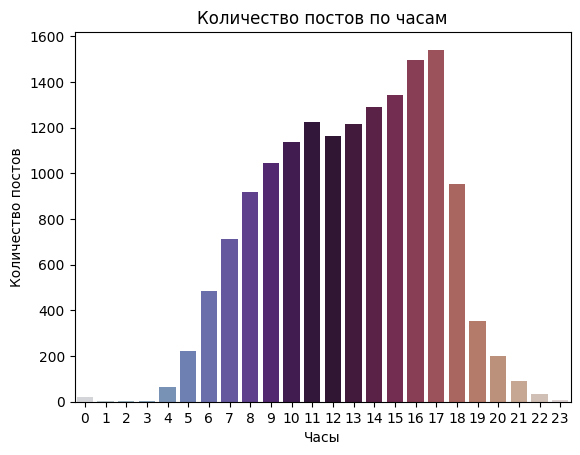

In [8]:
# построим зависимость количества постов от времени суток
sns.countplot(x=df['hour'], data=df, palette='twilight')
plt.xlabel('Часы')
plt.ylabel('Количество постов')
plt.title('Количество постов по часам')
plt.show()

/tmp/ipython-input-3490477684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['hour'], y=df['reactions'], data=df, palette='viridis')


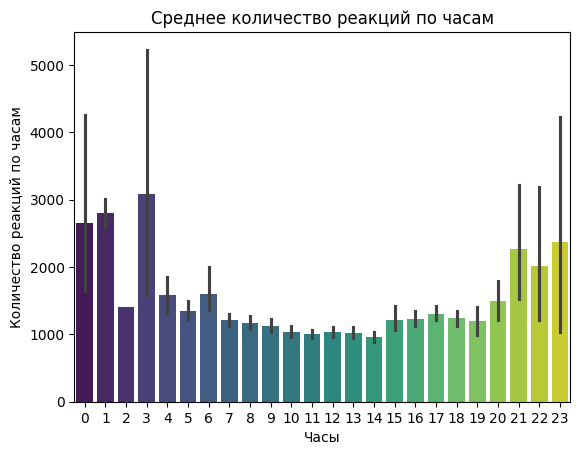

In [9]:
# построим зависимость количества реакций от времени суток
sns.barplot(x=df['hour'], y=df['reactions'], data=df, palette='viridis')
plt.xlabel('Часы')
plt.ylabel('Количество реакций по часам')
plt.title('Среднее количество реакций по часам')
plt.show()

/tmp/ipython-input-638621224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['hour'], y=df['views'], data=df, palette='PRGn')


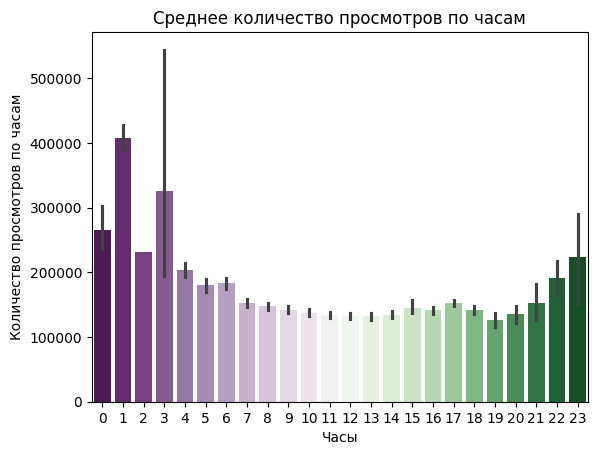

In [10]:
# построим зависимость количества просмотров от времени суток
sns.barplot(x=df['hour'], y=df['views'], data=df, palette='PRGn')
plt.xlabel('Часы')
plt.ylabel('Количество просмотров по часам')
plt.title('Среднее количество просмотров по часам')
plt.show()

/tmp/ipython-input-3837250890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['week_day'], data=df, palette='summer', order=days)


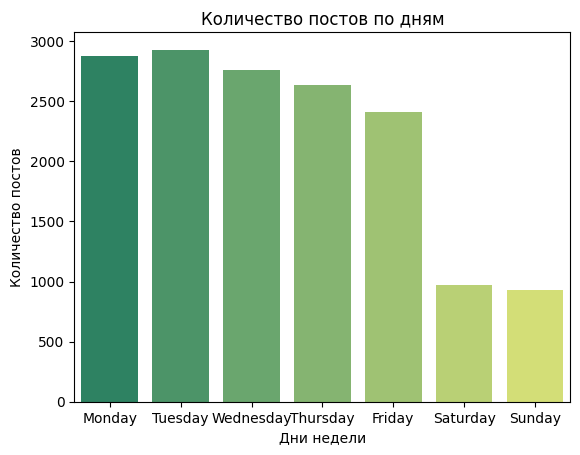

In [11]:
# посмотрим зависимость количества постов от дня недели
# для нормального отображения дней недели
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x=df['week_day'], data=df, palette='summer', order=days)
plt.xlabel('Дни недели')
plt.ylabel('Количество постов')
plt.title('Количество постов по дням')
plt.show()

Отследим динамику активности сообщества - зависимость между датой и кол-вом публикаций

In [12]:
import plotly.express as px

In [13]:
# создадим новую колонку, где будет только дата
df['only_date']=df['date'].dt.date

df.head(6)

,id_post,date,text,views,reactions,comments,hour,week_day,only_date
0,24383,2025-04-19 06:00:24+00:00,Universal Pictures анонсировала спортивный хор...,34219,247,25,6,Saturday,2025-04-19
1,24382,2025-04-18 20:24:57+00:00,"Народ, видос долго заливался и обрабатывался! ...",82358,749,39,20,Friday,2025-04-18
2,24381,2025-04-18 17:59:01+00:00,**Tesla обвиняется в чрезмерной накрутке пробе...,88704,916,33,17,Friday,2025-04-18
3,24380,2025-04-18 17:01:37+00:00,**Google добавит красок в чистый Android 16**\...,82788,477,78,17,Friday,2025-04-18
4,24378,2025-04-18 16:01:12+00:00,**Новая игра от авторов FTL и Into the Breach ...,78271,417,11,16,Friday,2025-04-18
5,24372,2025-04-18 14:59:01+00:00,**Skullcandy и Bose представили Method 360 — б...,78394,465,25,14,Friday,2025-04-18


In [14]:
df['only_date'] = pd.to_datetime(df['only_date'])

In [15]:
# считаем количество постов за каждый день
posts_count = df['only_date'].value_counts().sort_index().reset_index()

posts_count.columns = ['only_date', 'count']

In [16]:
# проверочка
posts_count.max()

,0
only_date,2025-04-19 00:00:00
count,135


In [17]:
posts_count

,only_date,count
0,2017-05-31,4
1,2017-06-01,6
2,2017-06-02,3
3,2017-06-05,3
4,2017-06-06,2
...,...,...
2587,2025-04-15,10
2588,2025-04-16,11
2589,2025-04-17,22
2590,2025-04-18,13


In [18]:
# построение графика
fig = px.line(posts_count, x='only_date', y='count', title='Динамика публикаций по дням').update_layout(
    xaxis_title='Дата', yaxis_title='Количество публикаций')
fig.show()

Гистограмма процентного соотношения между кол-вом просмотров и лайков

In [29]:
# высчитываем проценты
df['reaction_per'] = df['reactions'] / df['views'] * 100

df['log_reaction_per'] = np.log1p(df['reaction_per'])

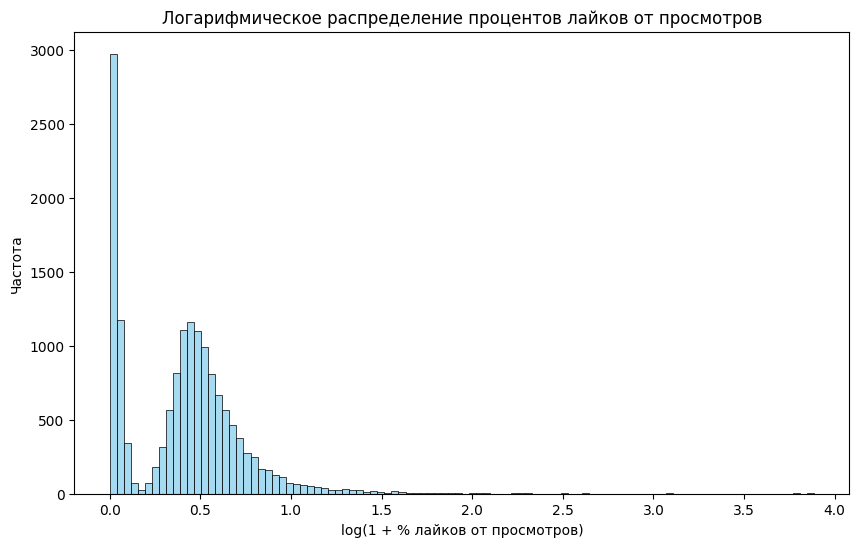

In [31]:
# график для процентного соотношения между количеством просмотров и лайков
plt.figure(figsize=(10, 6))
sns.histplot(df['log_reaction_per'], bins=100, color='skyblue')
plt.title('Логарифмическое распределение процентов лайков от просмотров')
plt.xlabel('log(1 + % лайков от просмотров)')
plt.ylabel('Частота')
plt.show()